# Analysing employees' reasons for quitting

In this project we will examine the following questions

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? Is it the same for older employees?

In order to do this, we will first need to clean the data to get into a format that makes analysis easier.

## Exploration and observation of dataframes

In [1]:
# setting up notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# read in survey data
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

Let's first take a look at the data sets. We'll start with dete

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [5]:
# view each separately
dete_survey['SeparationType'].value_counts()
dete_survey['DETE Start Date'].value_counts()
dete_survey['Region'].value_counts()
dete_survey['Interpersonal conflicts'].value_counts()
dete_survey['Business Unit'].value_counts()
dete_survey['Career Aspirations'].value_counts()
dete_survey['Worklife balance'].value_counts()

A     359
SA    162
N     116
D     107
SD     59
M      12
Name: Worklife balance, dtype: int64

In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [7]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [8]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [9]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [10]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [11]:
# view each separately
print(tafe_survey['Reason for ceasing employment'].value_counts())
print(' ')
print(tafe_survey['Contributing Factors. Career Move - Private Sector '].value_counts())
print(' ')
print(tafe_survey['InstituteViews. Topic:10. Staff morale was positive within the Institute'].value_counts())
print(' ')
print(tafe_survey['WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work'].value_counts())

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64
 
-                               336
Career Move - Private Sector    101
Name: Contributing Factors. Career Move - Private Sector , dtype: int64
 
Neutral              154
Agree                146
Disagree             139
Strongly Disagree    109
Strongly Agree        47
Not Applicable         7
Name: InstituteViews. Topic:10. Staff morale was positive within the Institute, dtype: int64
 
Agree                253
Strongly Agree       198
Neutral               86
Disagree              40
Strongly Disagree     27
Not Applicable         6
Name: WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work, dtype: int64


#### Observations:

* Some columns could be melted. 
* In `dete_survey`, NaN values are conveyed at 'Not Stated'
* Many unnecessary columns (unrelated to our question)
* In each dataframe same column but different name (must rename)

## Change NA values and drop unnecessary columns

We will read in the `dete_survey` dataframe again, this time specifying the `na values` and 'Not Stated.

After that, let's drop the columns that will not be relevant to our analysis.

In [12]:
# read in replacing Not Stated as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [13]:
# dropping unused columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Standardise column names

In order to merge the two dataframes we will need to clean the column names and rename some columns. 

To save time, we'll create a function that cleans the column names.

In [14]:
# function to clean columns names
def clean_columns(df):
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
    return df.columns

In [15]:
clean_columns(dete_survey_updated)
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [16]:
# Rename column names of tafe survey
tafe_survey_updated_2 = tafe_survey_updated.copy()
tafe_survey_updated_2.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [17]:
tafe_survey_updated_2 = tafe_survey_updated_2.rename(columns={'Record ID': 'id',
                                                              'CESSATION YEAR': 'cease_date',
                                                              'Reason for ceasing employment': 'separationtype',
                                                              'Gender. What is your Gender?': 'gender',
                                                              'CurrentAge. Current Age': 'age',
                                                              'Employment Type. Employment Type': 'employment_status', 
                                                              'Classification. Classification': 'position',
                                                              'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                                              'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
                                                             })

In [18]:
tafe_survey_updated.columns = tafe_survey_updated_2.columns

## Filter the data

Next, as we are analysing employees who voluntary chose to leave the institute, we only want to examine columns containing the string `'Resignation'`.

In [19]:
print(dete_survey_updated['separationtype'].value_counts())
print('\n')
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [20]:
# select resignation type columns

dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') | 
                    (dete_survey_updated['separationtype'] == 'Resignation-Other employer') | 
                    (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')]

dete_resignations = dete_resignations.copy()

tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated['separationtype'] == 'Resignation']

tafe_resignations = tafe_resignations.copy()


In [21]:
print(dete_resignations.head())
print('\n')
print(tafe_resignations.head())

    id                        separationtype cease_date  dete_start_date  \
3    4             Resignation-Other reasons    05/2012           2005.0   
5    6             Resignation-Other reasons    05/2012           1994.0   
8    9             Resignation-Other reasons    07/2012           2009.0   
9   10            Resignation-Other employer       2012           1997.0   
11  12  Resignation-Move overseas/interstate       2012           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  ...  work_life_balance  \
3

## Data verification

Now we must check the dates are in a reasonable range. Let's use the following criteria:

* No start dates before 1940 (this would be unlikely)
* No cease dates after current date

In [22]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [23]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'([2][0][0-9]{2})').astype('float')

In [24]:
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_values(ascending=False)

NaN       28
2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1998.0     6
2002.0     6
1994.0     6
1996.0     6
1992.0     6
2003.0     6
1980.0     5
1990.0     5
1997.0     5
1993.0     5
1989.0     4
1995.0     4
1988.0     4
1991.0     4
2001.0     3
1986.0     3
1985.0     3
1976.0     2
1983.0     2
1974.0     2
1975.0     1
1982.0     1
1987.0     1
1973.0     1
1971.0     1
1984.0     1
1972.0     1
1963.0     1
1977.0     1
Name: dete_start_date, dtype: int64

In [25]:
dete_resignations['cease_date'].value_counts().sort_values(ascending=False)

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [26]:
tafe_resignations['cease_date'].value_counts().sort_values(ascending=False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

## Create column specifying service length

In order to answer our question if employees who worked for a shorter time period resigned due to dissatisfaction, we need a column to indicate the length of time they worked.

In [27]:
# creating institute_service column for dete

dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [28]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [29]:
print(dete_resignations.columns)
print('\n')
print(tafe_resignations.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')


Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Caree

## Identify dissatified employees

Now, let's make a new column `dissatisfied` with a boolean value.


In [30]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [31]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [32]:
# converting values to boolean
def update_value(x):
    if pd.isnull(x):
        return np.nan
    elif x == '-':
        return False
    else:
        return True


In [33]:
# apply function to tafe survey
tafe_resignations[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']] = tafe_resignations[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']].applymap(update_value)

In [34]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [35]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [36]:
dete_resignations['job_dissatisfaction'].value_counts()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

In [37]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                                                          'Contributing Factors. Job Dissatisfaction']
                                                        ].any(axis=1, skipna=False)

In [38]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [39]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
                                                          'dissatisfaction_with_the_department',
                                                          'physical_work_environment',
                                                          'lack_of_recognition',
                                                          'lack_of_job_security',
                                                          'work_location',
                                                          'employment_conditions',
                                                          'work_life_balance',
                                                          'workload']
                                                        ].any(axis=1, skipna=False)

In [40]:
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [41]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

## Combining dataframes

First, we will create an additional column specifying the institute name to use as a reference point. Then, let's join the the two dataframes, dropping any unneeded columns.

In [42]:
dete_resignations_up['institute'] = 'DETE'

In [43]:
tafe_resignations_up['institute'] = 'TAFE'

In [44]:
# combine dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

C:\Users\nt871\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [45]:
combined_updated = combined.dropna(thresh=500, axis=1)

In [46]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

C:\Users\nt871\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract('(\d+)').astype(float)

C:\Users\nt871\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
combined_updated = combined_updated.copy()

## Categorise experience level

To make comparison easier, we will categorise the `institute_service` column based on career stage. Let's use the following categories:

* New: less than 3 years experience
* Experienced: 3 to 6 years experience
* Established: 7 to 10 years experience
* Veteran: More than 10 years experience

In [49]:
# create function to categorise experience level
def categorize(val):
    if val < 3:
        return 'New'
    elif 3 <= val <= 6:
        return 'Experienced'
    elif 7 <= val <= 10:
        return 'Established'
    elif 11 <= val:
        return 'Veteran'
    elif pd.isnull(val):
        return np.nan

In [50]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(categorize)

In [51]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Fill missing values

As the `dissatisfied` column contains few `na` values, we will fill them with the most common value, `False`.

In [52]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [53]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna('False')

In [54]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].astype(bool)

## Visualisation of results

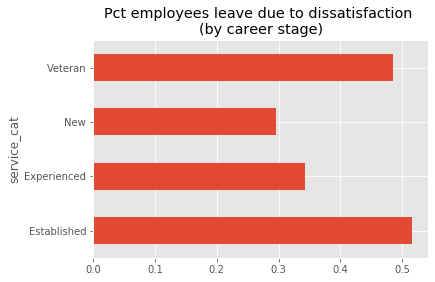

In [55]:
# pivot table for experience levels
pivot_tbl = combined_updated.pivot_table(values='dissatisfied', 
                                         index='service_cat'
                                        )
pivot_tbl.plot(kind='barh', legend=False)
plt.title('''Pct employees leave due to dissatisfaction 
(by career stage)''')
plt.show()

The above table shows, maybe surprisingly, that employees with more than 7 years experience seem to be more likely to resign out of dissatifaction than their colleagues with less than 7 years experience.